# Test Opponnent to choose thetas

In [1]:
import sys
sys.path.insert(0, 'C:\\Users\\gauthieca\\Desktop\\Code_ Thèse\\bandits-to-rank')

In [2]:
from bandits_to_rank.bandits import *
from bandits_to_rank.environment import *
from bandits_to_rank.referee import *
from bandits_to_rank.opponents import oracle,random_player,greedy,bc_mpts
from bandits_to_rank.opponents.pbm_ts import *
from bandits_to_rank.sampling.pbm_inference import *


import time
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import floor, log
from random import shuffle
from copy import deepcopy


%reload_ext autoreload
%autoreload 2 

In [3]:
def time_sec_to_HMS(sec):
    heure=sec//3600
    rest_h=sec%3600
    minute=rest_h//60
    rest_m=rest_h%60

    return(str(int(heure))+'H '+str(int(minute))+'min '+str(int(rest_m))+'sec')

# Test thetas

## thetas = [0.1,0.09,...]

In [22]:
kappas = [1,0.3,0.6,0.75,0.1]
thetas1 = [0.1,0.09]+[round(uniform(0, 0.09),2) for i  in range(8)]
nb_prop = len(thetas1)  
nb_place = len(kappas)

In [24]:
thetas1

[0.1, 0.09, 0.08, 0.03, 0.06, 0.04, 0.01, 0.05, 0.07, 0.03]

In [23]:
pas = 10
env = Environment_PBM(thetas1,kappas)

part0 = [np.array([uniform(0, 1) for i  in range(nb_prop)]), np.array([1]+[uniform(0, 1) for i  in range(1,nb_place)])]
 

player_Oracle = oracle.Oracle(env.get_best_index())
player_Random = random_player.Random(nb_prop,nb_place)

#player_d_TSMH_base_c_1 =  TS_MH_with_effi(nb_prop,nb_place,part0,pas,1)
player_TSMH_kappa_desord_c_1 =  TS_MH_kappa_desordonne(nb_prop,nb_place,part0,pas,1)

n_MAJ = 1
player_greedy = greedy.greedy(nb_prop,nb_place,n_MAJ)
player_greedy_EGreedy_10 =  greedy.greedy_EGreedy(10,nb_prop,nb_place,n_MAJ)
player_greedy_EGreedy_100 =  greedy.greedy_EGreedy(100,nb_prop,nb_place,n_MAJ)


player_BC_MPTS_triche = bc_mpts.BC_MPTS_triche(nb_prop,nb_place,kappas)
player_BC_MPTS_greedy = bc_mpts.BC_MPTS_greedy(nb_prop,nb_place,n_MAJ)    
    

### Game 20 Trial 5000

In [25]:
nb_trial = 5000
nb_game = 20

referee_Oracle_5000trials_20games_thetas1 = Referee(env,nb_trial)
referee_Random_5000trials_20games_thetas1 = Referee(env,nb_trial)

referee_greedy_5000trials_20games_thetas1  = Referee(env,nb_trial)
referee_greedy_EGreedy_100_5000trials_20games_thetas1 = Referee(env,nb_trial)
referee_greedy_EGreedy_10_5000trials_20games_thetas1= Referee(env,nb_trial)

referee_BC_MPTS_triche_5000trials_20games_thetas1  = Referee(env,nb_trial)
referee_BC_MPTS_greedy_5000trials_20games_thetas1 = Referee(env,nb_trial)

#referee_TSMH_base_1_5000trials_20games_thetas1  = Referee(env,nb_trial)
referee_TSMH_kappa_desord_1_5000trials_20games_thetas1  = Referee(env,nb_trial)


In [ ]:
start = time.time()
  
for i in range(nb_game):
    #print ('#### game '+str(i))
    #### Reboot player
    player_Oracle = oracle.Oracle(env.get_best_index())
    player_Random = random_player.Random(nb_prop,nb_place)


    player_greedy = greedy.greedy(nb_prop,nb_place,n_MAJ)
    player_greedy_EGreedy_10 =  greedy.greedy_EGreedy(10,nb_prop,nb_place,n_MAJ)
    player_greedy_EGreedy_100 =  greedy.greedy_EGreedy(100,nb_prop,nb_place,n_MAJ)


    player_BC_MPTS_triche = bc_mpts.BC_MPTS_triche(nb_prop,nb_place,kappas)
    player_BC_MPTS_greedy = bc_mpts.BC_MPTS_greedy(nb_prop,nb_place,n_MAJ)    
    
    #### Play game
    referee_Oracle_5000trials_20games_thetas1.play_game(player_Oracle)
    referee_Random_5000trials_20games_thetas1.play_game(player_Random)
    
    referee_greedy_5000trials_20games_thetas1.play_game(player_greedy)
    referee_greedy_EGreedy_100_5000trials_20games_thetas1.play_game(player_greedy_EGreedy_100)
    referee_greedy_EGreedy_10_5000trials_20games_thetas1.play_game(player_greedy_EGreedy_10)
    
    referee_BC_MPTS_triche_5000trials_20games_thetas1.play_game(player_BC_MPTS_triche)
    referee_BC_MPTS_greedy_5000trials_20games_thetas1.play_game(player_BC_MPTS_greedy)

end = time.time()   
print ('time :',time_sec_to_HMS(end-start)) 

In [16]:
start = time.time()
for i in range(nb_game):
    print ('#### game '+str(i))   
    start_game = time.time()
    ###Reboot player
    player_TSMH_kappa_desord_c_1 =  TS_MH_kappa_desordonne(nb_prop,nb_place,part0,pas,1)
    
    ##Play Game
    referee_TSMH_kappa_desord_1_5000trials_20games_thetas1.play_game(player_TSMH_kappa_desord_c_1)
    end_game = time.time()
    print ('time_game :',time_sec_to_HMS(end_game-start_game)) 
end = time.time()
print ('time :',time_sec_to_HMS(end-start))

#### game 0
time_game : 0H 1min 42sec
#### game 1
time_game : 0H 1min 49sec
#### game 2
time_game : 0H 1min 40sec
#### game 3
time_game : 0H 1min 35sec
#### game 4
time_game : 0H 1min 33sec
#### game 5
time_game : 0H 1min 33sec
#### game 6
time_game : 0H 1min 35sec
#### game 7
time_game : 0H 1min 34sec
#### game 8
time_game : 0H 1min 36sec
#### game 9
time_game : 0H 1min 35sec
#### game 10
time_game : 0H 1min 35sec
#### game 11
time_game : 0H 1min 34sec
#### game 12
time_game : 0H 1min 34sec
#### game 13
time_game : 0H 1min 35sec
#### game 14
time_game : 0H 1min 34sec
#### game 15
time_game : 0H 1min 34sec
#### game 16
time_game : 0H 1min 33sec
#### game 17
time_game : 0H 1min 34sec
#### game 18
time_game : 0H 1min 34sec
#### game 19
time_game : 0H 1min 35sec
time : 0H 32min 3sec


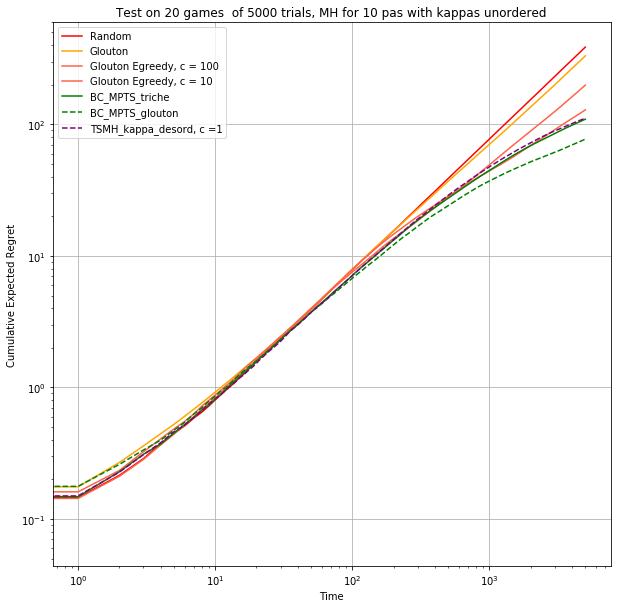

In [18]:
trials = [i for i in range(referee_Oracle_5000trials_20games_thetas1.nb_trials)]
plt.figure(figsize=(10, 10))

plt.plot(trials, np.cumsum(referee_Random_5000trials_20games_thetas1.get_regret_expected(), axis=0)[trials],'r-', label='Random')

plt.plot(trials, np.cumsum(referee_greedy_5000trials_20games_thetas1.get_regret_expected(), axis=0)[trials],'orange', label='greedy')
plt.plot(trials, np.cumsum(referee_greedy_EGreedy_100_5000trials_20games_thetas1.get_regret_expected(), axis=0)[trials],color='tomato', label='greedy Egreedy, c = 100')
plt.plot(trials, np.cumsum(referee_greedy_EGreedy_10_5000trials_20games_thetas1.get_regret_expected(), axis=0)[trials],color='b', label='greedy Egreedy, c = 10')

plt.plot(trials, np.cumsum(referee_BC_MPTS_triche_5000trials_20games_thetas1.get_regret_expected(), axis=0)[trials],'g-', label='BC_MPTS_triche')
plt.plot(trials, np.cumsum(referee_BC_MPTS_greedy_5000trials_20games_thetas1.get_regret_expected(), axis=0)[trials],'g--' ,label='BC_MPTS_greedy')

plt.plot(trials, np.cumsum(referee_TSMH_kappa_desord_1_5000trials_20games_thetas1.get_regret_expected(), axis=0)[trials], color = 'purple', linestyle = '--', label='TSMH_kappa_desord, c =1')

plt.xlabel('Time')
plt.ylabel('Cumulative Expected Regret')
plt.title ('Test on '+ str(nb_game) + ' games  of '+ str(nb_trial)+' trials, thetas='+str(thetas1))
plt.legend()
plt.grid(True)
plt.loglog()
plt.show()
  

### Game 20 Trial 10000

In [25]:
nb_trial = 10000
nb_game = 20

referee_Oracle_10000trials_20games_thetas1 = Referee(env,nb_trial)
referee_Random_10000trials_20games_thetas1 = Referee(env,nb_trial)

referee_greedy_10000trials_20games_thetas1  = Referee(env,nb_trial)
referee_greedy_EGreedy_100_10000trials_20games_thetas1 = Referee(env,nb_trial)
referee_greedy_EGreedy_10_10000trials_20games_thetas1= Referee(env,nb_trial)

referee_BC_MPTS_triche_10000trials_20games_thetas1  = Referee(env,nb_trial)
referee_BC_MPTS_greedy_10000trials_20games_thetas1 = Referee(env,nb_trial)

#referee_TSMH_base_1_5000trials_20games_thetas1  = Referee(env,nb_trial)
referee_TSMH_kappa_desord_1_10000trials_20games_thetas1  = Referee(env,nb_trial)


In [26]:
start = time.time()
  
for i in range(nb_game):
    #print ('#### game '+str(i))
    #### Reboot player
    player_Oracle = oracle.Oracle(env.get_best_index())
    player_Random = random_player.Random(nb_prop,nb_place)


    player_greedy = greedy.greedy(nb_prop,nb_place,n_MAJ)
    player_greedy_EGreedy_10 =  greedy.greedy_EGreedy(10,nb_prop,nb_place,n_MAJ)
    player_greedy_EGreedy_100 =  greedy.greedy_EGreedy(100,nb_prop,nb_place,n_MAJ)


    player_BC_MPTS_triche = bc_mpts.BC_MPTS_triche(nb_prop,nb_place,kappas)
    player_BC_MPTS_greedy = bc_mpts.BC_MPTS_greedy(nb_prop,nb_place,n_MAJ)    
    
    #### Play game
    referee_Oracle_10000trials_20games_thetas1.play_game(player_Oracle)
    referee_Random_10000trials_20games_thetas1.play_game(player_Random)
    
    referee_greedy_10000trials_20games_thetas1.play_game(player_greedy)
    referee_greedy_EGreedy_100_10000trials_20games_thetas1.play_game(player_greedy_EGreedy_100)
    referee_greedy_EGreedy_10_10000trials_20games_thetas1.play_game(player_greedy_EGreedy_10)
    
    referee_BC_MPTS_triche_10000trials_20games_thetas1.play_game(player_BC_MPTS_triche)
    referee_BC_MPTS_greedy_10000trials_20games_thetas1.play_game(player_BC_MPTS_greedy)

end = time.time()   
print ('time :',time_sec_to_HMS(end-start)) 

time : 0H 4min 17sec


In [28]:
start = time.time()
for i in range(nb_game):
    print ('#### game '+str(i))   
    start_game = time.time()
    ###Reboot player
    player_TSMH_kappa_desord_c_1 =  TS_MH_kappa_desordonne(nb_prop,nb_place,part0,pas,1)
    
    ##Play Game
    referee_TSMH_kappa_desord_1_10000trials_20games_thetas1.play_game(player_TSMH_kappa_desord_c_1)
    end_game = time.time()
    print ('time_game :',time_sec_to_HMS(end_game-start_game)) 
end = time.time()
print ('time :',time_sec_to_HMS(end-start))

#### game 0
time_game : 0H 3min 9sec
#### game 1
time_game : 0H 3min 8sec
#### game 2
time_game : 0H 3min 27sec
#### game 3
time_game : 0H 3min 28sec
#### game 4
time_game : 0H 3min 26sec
#### game 5
time_game : 0H 3min 30sec
#### game 6
time_game : 0H 3min 25sec
#### game 7
time_game : 0H 3min 23sec
#### game 8
time_game : 0H 3min 3sec
#### game 9
time_game : 0H 3min 3sec
#### game 10
time_game : 0H 3min 13sec
#### game 11
time_game : 0H 3min 26sec
#### game 12
time_game : 0H 3min 38sec
#### game 13
time_game : 0H 3min 29sec
#### game 14
time_game : 0H 3min 21sec
#### game 15
time_game : 0H 3min 28sec
#### game 16
time_game : 0H 3min 9sec
#### game 17
time_game : 0H 3min 13sec
#### game 18
time_game : 0H 3min 6sec
#### game 19
time_game : 0H 3min 31sec
time : 1H 6min 47sec


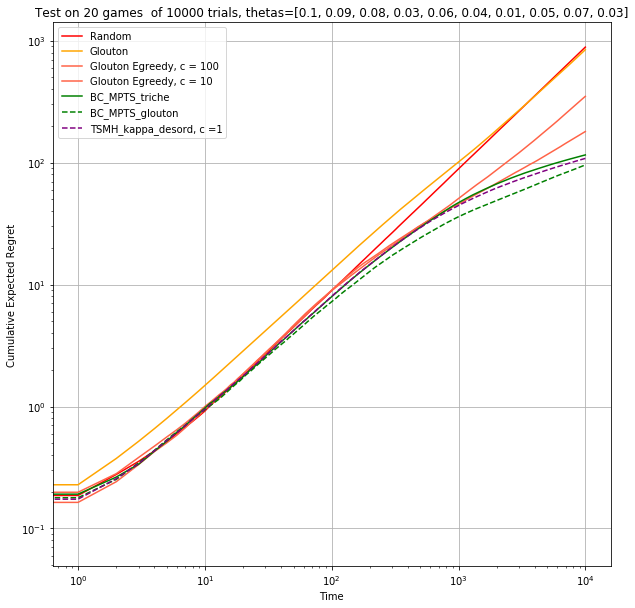

In [29]:
trials = [i for i in range(referee_Oracle_10000trials_20games_thetas1.nb_trials)]
plt.figure(figsize=(10, 10))

plt.plot(trials, np.cumsum(referee_Random_10000trials_20games_thetas1.get_regret_expected(), axis=0)[trials],'r-', label='Random')

plt.plot(trials, np.cumsum(referee_greedy_10000trials_20games_thetas1.get_regret_expected(), axis=0)[trials],'orange', label='greedy')
plt.plot(trials, np.cumsum(referee_greedy_EGreedy_100_10000trials_20games_thetas1.get_regret_expected(), axis=0)[trials],color='tomato', label='greedy Egreedy, c = 100')
plt.plot(trials, np.cumsum(referee_greedy_EGreedy_10_10000trials_20games_thetas1.get_regret_expected(), axis=0)[trials],color='b', label='greedy Egreedy, c = 10')

plt.plot(trials, np.cumsum(referee_BC_MPTS_triche_10000trials_20games_thetas1.get_regret_expected(), axis=0)[trials],'g-', label='BC_MPTS_triche')
plt.plot(trials, np.cumsum(referee_BC_MPTS_greedy_10000trials_20games_thetas1.get_regret_expected(), axis=0)[trials],'g--' ,label='BC_MPTS_greedy')

plt.plot(trials, np.cumsum(referee_TSMH_kappa_desord_1_10000trials_20games_thetas1.get_regret_expected(), axis=0)[trials], color = 'purple', linestyle = '--', label='TSMH_kappa_desord, c =1')

plt.xlabel('Time')
plt.ylabel('Cumulative Expected Regret')
plt.title ('Test on '+ str(nb_game) + ' games  of '+ str(nb_trial)+' trials, thetas='+str(thetas1))
plt.legend()
plt.grid(True)
plt.loglog()
plt.show()
  

### Game 20 Trial 100000

In [50]:
nb_trial = 100000
nb_game = 20

referee_Oracle_100000trials_20games_thetas1 = Referee(env,nb_trial)
referee_Random_100000trials_20games_thetas1 = Referee(env,nb_trial)

referee_greedy_100000trials_20games_thetas1  = Referee(env,nb_trial)
referee_greedy_EGreedy_100_100000trials_20games_thetas1 = Referee(env,nb_trial)
referee_greedy_EGreedy_10_100000trials_20games_thetas1= Referee(env,nb_trial)

referee_BC_MPTS_triche_100000trials_20games_thetas1  = Referee(env,nb_trial)
referee_BC_MPTS_greedy_100000trials_20games_thetas1 = Referee(env,nb_trial)

#referee_TSMH_base_1_5000trials_20games_thetas1  = Referee(env,nb_trial)
referee_TSMH_kappa_desord_1_100000trials_20games_thetas1  = Referee(env,nb_trial)


In [60]:
start = time.time()
  
for i in range(nb_game):
    #print ('#### game '+str(i))
    #### Reboot player
    player_Oracle = oracle.Oracle(env.get_best_index())
    player_Random = random_player.Random(nb_prop,nb_place)


    player_greedy = greedy.greedy(nb_prop,nb_place,n_MAJ)
    player_greedy_EGreedy_10 =  greedy.greedy_EGreedy(10,nb_prop,nb_place,n_MAJ)
    player_greedy_EGreedy_100 =  greedy.greedy_EGreedy(100,nb_prop,nb_place,n_MAJ)


    player_BC_MPTS_triche = bc_mpts.BC_MPTS_triche(nb_prop,nb_place,kappas)
    player_BC_MPTS_greedy = bc_mpts.BC_MPTS_greedy(nb_prop,nb_place,n_MAJ)    
    
    #### Play game
    referee_Oracle_100000trials_20games_thetas1.play_game(player_Oracle)
    referee_Random_100000trials_20games_thetas1.play_game(player_Random)
    
    referee_greedy_100000trials_20games_thetas1.play_game(player_greedy)
    referee_greedy_EGreedy_100_100000trials_20games_thetas1.play_game(player_greedy_EGreedy_100)
    referee_greedy_EGreedy_10_100000trials_20games_thetas1.play_game(player_greedy_EGreedy_10)
    
    referee_BC_MPTS_triche_100000trials_20games_thetas1.play_game(player_BC_MPTS_triche)
    referee_BC_MPTS_greedy_100000trials_20games_thetas1.play_game(player_BC_MPTS_greedy)

end = time.time()   
print ('time :',time_sec_to_HMS(end-start)) 

time : 1H 4min 11sec


In [28]:
start = time.time()
for i in range(nb_game):
    print ('#### game '+str(i))   
    start_game = time.time()
    ###Reboot player
    player_TSMH_kappa_desord_c_1 =  TS_MH_kappa_desordonne(nb_prop,nb_place,part0,pas,1)
    
    ##Play Game
    referee_TSMH_kappa_desord_1_100000trials_20games_thetas1.play_game(player_TSMH_kappa_desord_c_1)
    end_game = time.time()
    print ('time_game :',time_sec_to_HMS(end_game-start_game)) 
end = time.time()
print ('time :',time_sec_to_HMS(end-start))

#### game 0
time_game : 0H 3min 9sec
#### game 1
time_game : 0H 3min 8sec
#### game 2
time_game : 0H 3min 27sec
#### game 3
time_game : 0H 3min 28sec
#### game 4
time_game : 0H 3min 26sec
#### game 5
time_game : 0H 3min 30sec
#### game 6
time_game : 0H 3min 25sec
#### game 7
time_game : 0H 3min 23sec
#### game 8
time_game : 0H 3min 3sec
#### game 9
time_game : 0H 3min 3sec
#### game 10
time_game : 0H 3min 13sec
#### game 11
time_game : 0H 3min 26sec
#### game 12
time_game : 0H 3min 38sec
#### game 13
time_game : 0H 3min 29sec
#### game 14
time_game : 0H 3min 21sec
#### game 15
time_game : 0H 3min 28sec
#### game 16
time_game : 0H 3min 9sec
#### game 17
time_game : 0H 3min 13sec
#### game 18
time_game : 0H 3min 6sec
#### game 19
time_game : 0H 3min 31sec
time : 1H 6min 47sec


In [62]:
referee_greedy_EGreedy_10_100000trials_20games_thetas1.get_regret_expected()

array([0.2543  , 0.2386  , 0.237675, ..., 0.02405 , 0.02405 , 0.02405 ])

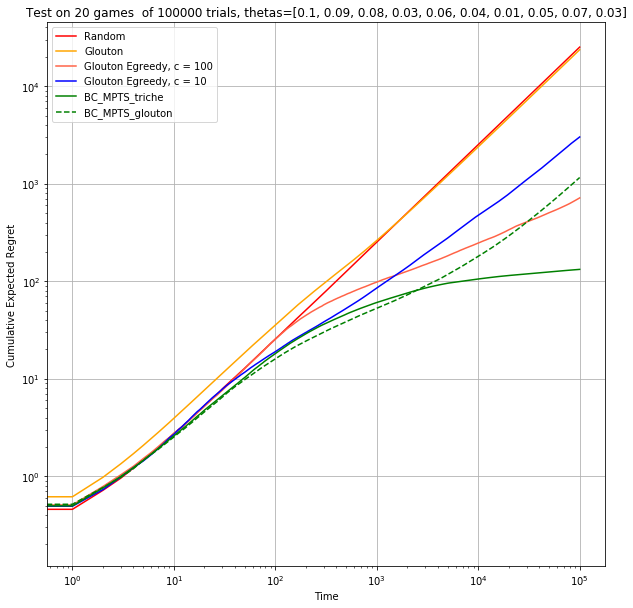

In [63]:
trials = [i for i in range(referee_Oracle_100000trials_20games_thetas1.nb_trials)]
plt.figure(figsize=(10, 10))

plt.plot(trials, np.cumsum(referee_Random_100000trials_20games_thetas1.get_regret_expected(), axis=0)[trials],'r-', label='Random')

plt.plot(trials, np.cumsum(referee_greedy_100000trials_20games_thetas1.get_regret_expected(), axis=0)[trials],'orange', label='greedy')
plt.plot(trials, np.cumsum(referee_greedy_EGreedy_100_100000trials_20games_thetas1.get_regret_expected(), axis=0)[trials],color='tomato', label='greedy Egreedy, c = 100')
plt.plot(trials, np.cumsum(referee_greedy_EGreedy_10_100000trials_20games_thetas1.get_regret_expected(), axis=0)[trials],color='b', label='greedy Egreedy, c = 10')

plt.plot(trials, np.cumsum(referee_BC_MPTS_triche_100000trials_20games_thetas1.get_regret_expected(), axis=0)[trials],'g-', label='BC_MPTS_triche')
plt.plot(trials, np.cumsum(referee_BC_MPTS_greedy_100000trials_20games_thetas1.get_regret_expected(), axis=0)[trials],'g--' ,label='BC_MPTS_greedy')

#plt.plot(trials, np.cumsum(referee_TSMH_kappa_desord_1_100000trials_20games_thetas1.get_regret_expected(), axis=0)[trials], color = 'purple', linestyle = '--', label='TSMH_kappa_desord, c =1')

plt.xlabel('Time')
plt.ylabel('Cumulative Expected Regret')
plt.title ('Test on '+ str(nb_game) + ' games  of '+ str(nb_trial)+' trials, thetas='+str(thetas1))
plt.legend()
plt.grid(True)
plt.loglog()
plt.show()
  

### write logs 

In [64]:
pwd

'C:\\Users\\gauthieca\\Desktop\\Code_ Thèse\\bandits-to-rank\\Test\\interaction'

In [66]:
cd result/test_thetas/thetas1/general

C:\Users\gauthieca\Desktop\Code_ Thèse\bandits-to-rank\Test\interaction\result\test_thetas\thetas1\general


In [68]:

with open('referee_Oracle_100000trials_20games_thetas1.txt', 'w') as file:
    json.dump(referee_Oracle_100000trials_20games_thetas1.record_results, file)
with open('referee_Random_100000trials_20games_thetas1.txt', 'w') as file:
    json.dump(referee_Random_100000trials_20games_thetas1.record_results, file)
    
with open('referee_greedy_100000trials_20games_thetas1.txt', 'w') as file:
    json.dump(referee_greedy_100000trials_20games_thetas1.record_results, file)
with open('referee_greedy_EGreedy_100_100000trials_20games_thetas1.txt', 'w') as file:
    json.dump(referee_greedy_EGreedy_100_100000trials_20games_thetas1.record_results, file)
with open('referee_greedy_EGreedy_10_100000trials_20games_thetas1.txt', 'w') as file:
    json.dump(referee_greedy_EGreedy_10_100000trials_20games_thetas1.record_results, file)

with open('referee_BC_MPTS_triche_100000trials_20games_thetas1.txt', 'w') as file:
    json.dump(referee_BC_MPTS_triche_100000trials_20games_thetas1.record_results, file)    
with open('referee_BC_MPTS_greedy_100000trials_20games_thetas1.txt', 'w') as file:
    json.dump(referee_BC_MPTS_greedy_100000trials_20games_thetas1.record_results, file)
    

## thetas = [0.3,0.2,0.15,0.15,0.15,0.10,0.05,0.05,0.01,0.01]

In [4]:
kappas = [1,0.3,0.6,0.75,0.1]
thetas_final = [0.3,0.2,0.15,0.15,0.15,0.10,0.05,0.05,0.01,0.01]
nb_prop = len(thetas_final)  
nb_place = len(kappas)

In [5]:
pas = 10
env = Environment_PBM(thetas_final,kappas)

part0 = [np.array([uniform(0, 1) for i  in range(nb_prop)]), np.array([1]+[uniform(0, 1) for i  in range(1,nb_place)])]
 

player_Oracle = oracle.Oracle(env.get_best_index())
player_Random = random_player.Random(nb_prop,nb_place)

#player_d_TSMH_base_c_1 =  TS_MH_with_effi(nb_prop,nb_place,part0,pas,1)
player_TSMH_kappa_desord_c_1 =  TS_MH_kappa_desordonne(nb_prop,nb_place,part0,pas,1)

n_MAJ = 1
player_greedy = greedy.greedy(nb_prop,nb_place,n_MAJ)
player_greedy_EGreedy_10 =  greedy.greedy_EGreedy(50,nb_prop,nb_place,n_MAJ)
player_greedy_EGreedy_100 =  greedy.greedy_EGreedy(100,nb_prop,nb_place,n_MAJ)


player_BC_MPTS_triche = bc_mpts.BC_MPTS_triche(nb_prop,nb_place,kappas)
player_BC_MPTS_greedy = bc_mpts.BC_MPTS_greedy(nb_prop,nb_place,n_MAJ) 

player_PBM_TS_triche= PBM_TS(nb_prop, discount_factor=kappas)
player_PBM_TS_greedy= PBM_TS(nb_prop, nb_positions=nb_place)    

### Game 20 Trial 5000

In [6]:
nb_trial = 5000
nb_game = 20

referee_Oracle_5000trials_20games_thetas_final = Referee(env,nb_trial)
referee_Random_5000trials_20games_thetas_final = Referee(env,nb_trial)

referee_greedy_5000trials_20games_thetas_final  = Referee(env,nb_trial)
referee_greedy_EGreedy_100_5000trials_20games_thetas_final = Referee(env,nb_trial)
referee_greedy_EGreedy_50_5000trials_20games_thetas_final = Referee(env,nb_trial)

referee_BC_MPTS_triche_5000trials_20games_thetas_final  = Referee(env,nb_trial)
referee_BC_MPTS_greedy_5000trials_20games_thetas_final = Referee(env,nb_trial)

referee_PBM_TS_triche_5000trials_20games_thetas_final  = Referee(env,nb_trial)
referee_PBM_TS_greedy_5000trials_20games_thetas_final = Referee(env,nb_trial)


#referee_TSMH_base_1_5000trials_20games_thetas3 = Referee(env,nb_trial)
referee_TSMH_kappa_desord_1_5000trials_20games_thetas_final  = Referee(env,nb_trial)


In [7]:
start = time.time()
  
for i in range(nb_game):
    #print ('#### game '+str(i))
    #### Reboot player
    player_Oracle = oracle.Oracle(env.get_best_index())
    player_Random = random_player.Random(nb_prop,nb_place)


    player_greedy = greedy.greedy(nb_prop,nb_place,n_MAJ)
    player_greedy_EGreedy_50 =  greedy.greedy_EGreedy(50,nb_prop,nb_place,n_MAJ)
    player_greedy_EGreedy_100 =  greedy.greedy_EGreedy(100,nb_prop,nb_place,n_MAJ)


    player_BC_MPTS_triche = bc_mpts.BC_MPTS_triche(nb_prop,nb_place,kappas)
    player_BC_MPTS_greedy = bc_mpts.BC_MPTS_greedy(nb_prop,nb_place,n_MAJ)    
    
    #### Play game
    referee_Oracle_5000trials_20games_thetas_final.play_game(player_Oracle)
    referee_Random_5000trials_20games_thetas_final.play_game(player_Random)
    
    referee_greedy_5000trials_20games_thetas_final.play_game(player_greedy)
    referee_greedy_EGreedy_100_5000trials_20games_thetas_final.play_game(player_greedy_EGreedy_100)
    referee_greedy_EGreedy_50_5000trials_20games_thetas_final.play_game(player_greedy_EGreedy_50)
    
    referee_BC_MPTS_triche_5000trials_20games_thetas_final.play_game(player_BC_MPTS_triche)
    referee_BC_MPTS_greedy_5000trials_20games_thetas_final.play_game(player_BC_MPTS_greedy)

end = time.time()   
print ('time :',time_sec_to_HMS(end-start)) 

time : 0H 2min 1sec


In [8]:
start = time.time()
  
for i in range(nb_game):
    print ('#### game '+str(i))
    #### Reboot player

    start_game = time.time()
    player_PBM_TS_triche= PBM_TS(nb_prop, discount_factor=kappas)
    
    #### Play game
   
    referee_PBM_TS_triche_5000trials_20games_thetas_final.play_game(player_PBM_TS_triche)
    
    end_game = time.time()   
    print ('time_game :',time_sec_to_HMS(end_game-start_game)) 

end = time.time()   
print ('time :',time_sec_to_HMS(end-start)) 

#### game 0
time_game : 0H 0min 45sec
#### game 1
time_game : 0H 0min 40sec
#### game 2
time_game : 0H 0min 33sec
#### game 3
time_game : 0H 0min 40sec
#### game 4
time_game : 0H 0min 34sec
#### game 5
time_game : 0H 0min 47sec
#### game 6
time_game : 0H 0min 39sec
#### game 7
time_game : 0H 0min 57sec
#### game 8
time_game : 0H 1min 24sec
#### game 9
time_game : 0H 0min 35sec
#### game 10
time_game : 0H 0min 58sec
#### game 11
time_game : 0H 0min 34sec
#### game 12
time_game : 0H 0min 41sec
#### game 13
time_game : 0H 0min 46sec
#### game 14
time_game : 0H 0min 42sec
#### game 15
time_game : 0H 0min 40sec
#### game 16
time_game : 0H 0min 45sec
#### game 17
time_game : 0H 0min 37sec
#### game 18
time_game : 0H 0min 44sec
#### game 19
time_game : 0H 0min 41sec
time : 0H 14min 50sec


In [9]:
start = time.time()
for i in range(nb_game):
    print ('#### game '+str(i))   
    start_game = time.time()
    ###Reboot player
    player_TSMH_kappa_desord_c_1 =  TS_MH_kappa_desordonne(nb_prop,nb_place,part0,pas,1)
    
    ##Play Game
    referee_TSMH_kappa_desord_1_5000trials_20games_thetas_final.play_game(player_TSMH_kappa_desord_c_1)
    end_game = time.time()
    print ('time_game :',time_sec_to_HMS(end_game-start_game)) 
end = time.time()
print ('time :',time_sec_to_HMS(end-start))

#### game 0
time_game : 0H 1min 52sec
#### game 1
time_game : 0H 1min 37sec
#### game 2
time_game : 0H 1min 19sec
#### game 3
time_game : 0H 1min 20sec
#### game 4
time_game : 0H 1min 23sec
#### game 5
time_game : 0H 1min 30sec
#### game 6
time_game : 0H 1min 24sec
#### game 7
time_game : 0H 1min 34sec
#### game 8
time_game : 0H 1min 24sec
#### game 9
time_game : 0H 1min 27sec
#### game 10
time_game : 0H 1min 30sec
#### game 11
time_game : 0H 1min 28sec
#### game 12
time_game : 0H 1min 43sec
#### game 13
time_game : 0H 1min 49sec
#### game 14
time_game : 0H 1min 48sec
#### game 15
time_game : 0H 1min 50sec
#### game 16
time_game : 0H 1min 23sec
#### game 17
time_game : 0H 1min 19sec
#### game 18
time_game : 0H 1min 20sec
#### game 19
time_game : 0H 1min 23sec
time : 0H 30min 32sec


In [11]:
start = time.time()
  
for i in range(nb_game):
    print ('#### game '+str(i))
    #### Reboot player

    start_game = time.time()

    player_PBM_TS_greedy= PBM_TS(nb_prop, nb_positions=nb_place)
    
    #### Play game
   
    referee_PBM_TS_greedy_5000trials_20games_thetas_final.play_game(player_PBM_TS_greedy)
    
    end_game = time.time()   
    print ('time_game :',time_sec_to_HMS(end_game-start_game)) 

end = time.time()   
print ('time :',time_sec_to_HMS(end-start)) 

#### game 0


C:\Users\gauthieca\Desktop\Code_ Thèse\bandits-to-rank\bandits_to_rank\opponents\pbm_ts.py:193: RuntimeWarning: divide by zero encountered in log
  log_p_proposal = np.log(thetas*more_seen_kappa) * (alpha-1)
C:\Users\gauthieca\Desktop\Code_ Thèse\bandits-to-rank\bandits_to_rank\opponents\pbm_ts.py:195: RuntimeWarning: invalid value encountered in subtract
  log_norm_proposal = np.log(np.sum(np.exp(log_p_proposal-max(log_p_proposal)))) + max(log_p_proposal)
C:\Users\gauthieca\Desktop\Code_ Thèse\bandits-to-rank\bandits_to_rank\opponents\pbm_ts.py:203: RuntimeWarning: divide by zero encountered in double_scalars
  theta = beta(alpha, beta_param) / more_seen_kappa
C:\Users\gauthieca\Desktop\Code_ Thèse\bandits-to-rank\bandits_to_rank\opponents\pbm_ts.py:208: RuntimeWarning: divide by zero encountered in double_scalars
  theta = beta(alpha, beta_param) / more_seen_kappa
C:\Users\gauthieca\Desktop\Code_ Thèse\bandits-to-rank\bandits_to_rank\opponents\pbm_ts.py:221: RuntimeWarning: divide by

time_game : 0H 40min 46sec
#### game 1
time_game : 2H 36min 32sec
#### game 2
time_game : 0H 8min 52sec
#### game 3


C:\Users\gauthieca\Desktop\Code_ Thèse\bandits-to-rank\bandits_to_rank\opponents\pbm_ts.py:193: RuntimeWarning: invalid value encountered in log
  log_p_proposal = np.log(thetas*more_seen_kappa) * (alpha-1)
C:\Users\gauthieca\Desktop\Code_ Thèse\bandits-to-rank\bandits_to_rank\opponents\pbm_ts.py:198: RuntimeWarning: All-NaN slice encountered
  log_M = np.nanmax(log_p_target-log_p_proposal)
C:\Users\gauthieca\Desktop\Code_ Thèse\bandits-to-rank\bandits_to_rank\opponents\pbm_ts.py:218: RuntimeWarning: invalid value encountered in log
  threshold += np.log(1-theta*self.discount_factor[i_pos]) * (self.vu_place[i_arm][i_pos] - self.success[i_arm][i_pos] + self.prior_f - 1)


time_game : 0H 5min 37sec
#### game 4
time_game : 0H 6min 53sec
#### game 5
time_game : 0H 23min 53sec
#### game 6
time_game : 1H 10min 22sec
#### game 7
time_game : 0H 8min 10sec
#### game 8
time_game : 1H 2min 7sec
#### game 9
time_game : 1H 25min 24sec
#### game 10
time_game : 0H 12min 41sec
#### game 11
time_game : 1H 45min 37sec
#### game 12
time_game : 0H 9min 26sec
#### game 13
time_game : 1H 25min 12sec
#### game 14
time_game : 0H 17min 59sec
#### game 15
time_game : 1H 14min 34sec
#### game 16
time_game : 1H 14min 26sec
#### game 17
time_game : 0H 22min 54sec
#### game 18
time_game : 0H 50min 48sec
#### game 19
time_game : 1H 7min 57sec
time : 16H 30min 20sec


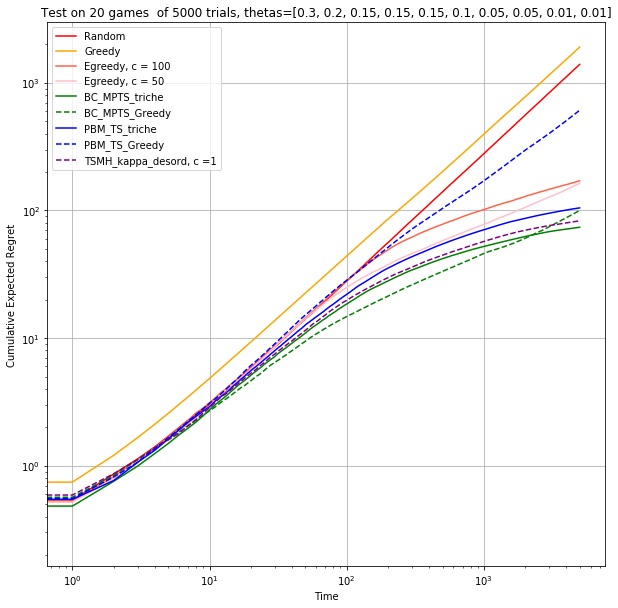

In [17]:
trials = [i for i in range(referee_Oracle_5000trials_20games_thetas_final.nb_trials)]
plt.figure(figsize=(10, 10))

plt.plot(trials, np.cumsum(referee_Random_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials],'r-', label='Random')

plt.plot(trials, np.cumsum(referee_greedy_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials],'orange', label='Greedy')
plt.plot(trials, np.cumsum(referee_greedy_EGreedy_100_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials],color='tomato', label='Egreedy, c = 100')
plt.plot(trials, np.cumsum(referee_greedy_EGreedy_50_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials],color='pink', label='Egreedy, c = 50')

plt.plot(trials, np.cumsum(referee_BC_MPTS_triche_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials],'g-', label='BC_MPTS_triche')
plt.plot(trials, np.cumsum(referee_BC_MPTS_greedy_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials],'g--' ,label='BC_MPTS_Greedy')

plt.plot(trials, np.cumsum(referee_PBM_TS_triche_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials],'b-', label='PBM_TS_triche')
plt.plot(trials, np.cumsum(referee_PBM_TS_greedy_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials],'b--' ,label='PBM_TS_Greedy')

plt.plot(trials, np.cumsum(referee_TSMH_kappa_desord_1_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'purple', linestyle = '--', label='TSMH_kappa_desord, c =1')

plt.xlabel('Time')
plt.ylabel('Cumulative Expected Regret')
plt.title ('Test on '+ str(nb_game) + ' games  of '+ str(referee_Oracle_5000trials_20games_thetas_final.nb_trials)+' trials, thetas='+str(thetas_final))
plt.legend()
plt.grid(True)
plt.loglog()
plt.show()
  

### write logs 

In [13]:
pwd

'C:\\Users\\gauthieca\\Desktop\\Code_ Thèse\\bandits-to-rank\\Test\\interaction\\test_thetas'

In [14]:
cd ../

C:\Users\gauthieca\Desktop\Code_ Thèse\bandits-to-rank\Test\interaction


In [15]:
cd result/test_thetas/thetas_final/Opponents

C:\Users\gauthieca\Desktop\Code_ Thèse\bandits-to-rank\Test\interaction\result\test_thetas\thetas_final\Opponents


In [16]:

with open('referee_Oracle_5000trials_20games_thetas_final.txt', 'w') as file:
    json.dump(referee_Oracle_5000trials_20games_thetas_final.record_results, file)
with open('referee_Random_5000trials_20games_thetas_final.txt', 'w') as file:
    json.dump(referee_Random_5000trials_20games_thetas_final.record_results, file)
    
with open('referee_greedy_5000trials_20games_thetas_final.txt', 'w') as file:
    json.dump(referee_greedy_5000trials_20games_thetas_final.record_results, file)
with open('referee_greedy_EGreedy_100_5000trials_20games_thetas_final.txt', 'w') as file:
    json.dump(referee_greedy_EGreedy_100_5000trials_20games_thetas_final.record_results, file)
with open('referee_greedy_EGreedy_50_5000trials_20games_thetas_final.txt', 'w') as file:
    json.dump(referee_greedy_EGreedy_50_5000trials_20games_thetas_final.record_results, file)

with open('referee_BC_MPTS_triche_5000trials_20games_thetas_final.txt', 'w') as file:
    json.dump(referee_BC_MPTS_triche_5000trials_20games_thetas_final.record_results, file)    
with open('referee_BC_MPTS_greedy_5000trials_20games_thetas_final.txt', 'w') as file:
    json.dump(referee_BC_MPTS_greedy_5000trials_20games_thetas_final.record_results, file)

with open('referee_PBM_TS_triche_5000trials_20games_thetas_final.txt', 'w') as file:
    json.dump(referee_PBM_TS_triche_5000trials_20games_thetas_final.record_results, file)
with open('referee_PBM_TS_greedy_5000trials_20games_thetas_final.txt', 'w') as file:
    json.dump(referee_PBM_TS_greedy_5000trials_20games_thetas_final.record_results, file)
    
with open('referee_TSMH_kappa_desord_1_5000trials_20games_thetas_final.txt', 'w') as file:
    json.dump(referee_TSMH_kappa_desord_1_5000trials_20games_thetas_final.record_results, file)


### Load otherthetas =[0.3,0.2,0.15,0.15,0.1,0.1,0.05,0.05,0.01,0.01]

In [18]:
pwd

'C:\\Users\\gauthieca\\Desktop\\Code_ Thèse\\bandits-to-rank\\Test\\interaction\\result\\test_thetas\\thetas_final\\Opponents'

In [23]:
cd ../

C:\Users\gauthieca\Desktop\Code_ Thèse\bandits-to-rank\Test\interaction\result\test_thetas


In [24]:
cd theta3/Opponents

C:\Users\gauthieca\Desktop\Code_ Thèse\bandits-to-rank\Test\interaction\result\test_thetas\theta3\Opponents


In [25]:

with open('referee_Oracle_5000trials_20games_thetas_final.txt', 'r') as file:
    referee_Oracle_testtheta_dico = json.load(file)
with open('referee_Random_5000trials_20games_thetas_final.txt', 'r') as file:
    referee_Random_testtheta_dico=json.load(file)
    
with open('referee_greedy_5000trials_20games_thetas_final.txt', 'r') as file:
    referee_greedy_testtheta_dico=json.load(file)
with open('referee_greedy_EGreedy_100_5000trials_20games_thetas_final.txt', 'r') as file:
    referee_greedy_EGreedy_100_testtheta_dico=json.load( file)
with open('referee_greedy_EGreedy_50_5000trials_20games_thetas_final.txt', 'r') as file:
    referee_greedy_EGreedy_50_testtheta_dico=json.load(file)

with open('referee_BC_MPTS_triche_5000trials_20games_thetas_final.txt', 'r') as file:
    referee_BC_MPTS_triche_testtheta_dico=json.load(file)    
with open('referee_BC_MPTS_greedy_5000trials_20games_thetas_final.txt', 'r') as file:
    referee_BC_MPTS_greedy_testtheta_dico=json.load(file)

with open('referee_PBM_TS_triche_5000trials_20games_thetas_final.txt', 'r') as file:
    referee_PBM_TS_triche_testtheta_dico=json.load(file)
with open('referee_PBM_TS_greedy_5000trials_20games_thetas_final.txt', 'r') as file:
    referee_PBM_TS_greedy_testtheta_dico=json.load(file)
    
with open('referee_TSMH_kappa_desord_1_5000trials_20games_thetas_final.txt', 'r') as file:
    referee_TSMH_c_1_testtheta_dico=json.load(file)


In [26]:

referee_Oracle_testtheta = Referee(env,nb_trial)
referee_Random_testtheta = Referee(env,nb_trial)

referee_greedy_testtheta  = Referee(env,nb_trial)
referee_greedy_EGreedy_100_testtheta = Referee(env,nb_trial)
referee_greedy_EGreedy_50_testtheta = Referee(env,nb_trial)

referee_BC_MPTS_triche_testtheta  = Referee(env,nb_trial)
referee_BC_MPTS_greedy_testtheta = Referee(env,nb_trial)

referee_PBM_TS_triche_testtheta  = Referee(env,nb_trial)
referee_PBM_TS_greedy_testtheta = Referee(env,nb_trial)


referee_TSMH_c_1_testtheta  = Referee(env,nb_trial)


In [27]:

referee_Oracle_testtheta.record_results = referee_Oracle_testtheta_dico
referee_Random_testtheta.record_results = referee_Random_testtheta_dico

referee_greedy_testtheta.record_results  = referee_greedy_testtheta_dico
referee_greedy_EGreedy_100_testtheta.record_results =referee_greedy_EGreedy_100_testtheta_dico
referee_greedy_EGreedy_50_testtheta.record_results = referee_greedy_EGreedy_50_testtheta_dico

referee_BC_MPTS_triche_testtheta.record_results  = referee_BC_MPTS_triche_testtheta_dico
referee_BC_MPTS_greedy_testtheta.record_results = referee_BC_MPTS_greedy_testtheta_dico

referee_PBM_TS_triche_testtheta.record_results  =referee_PBM_TS_triche_testtheta_dico
referee_PBM_TS_greedy_testtheta.record_results = referee_PBM_TS_greedy_testtheta_dico

referee_TSMH_c_1_testtheta.record_results  = referee_TSMH_c_1_testtheta_dico


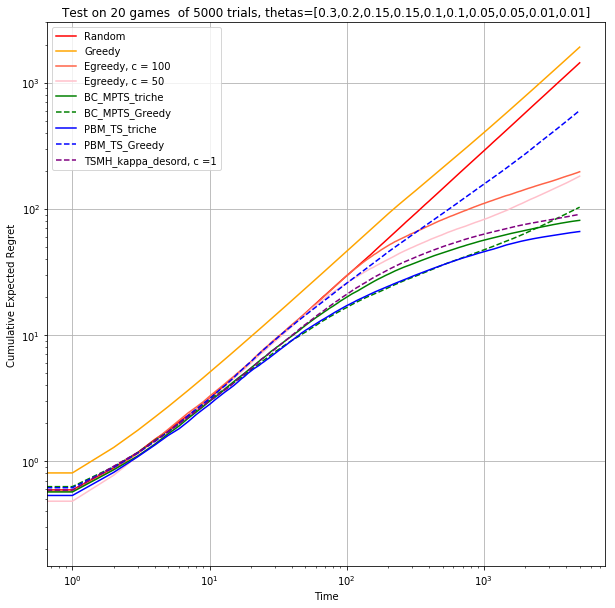

In [28]:
trials = [i for i in range(referee_Oracle_5000trials_20games_thetas_final.nb_trials)]
plt.figure(figsize=(10, 10))

plt.plot(trials, np.cumsum(referee_Random_testtheta.get_regret_expected(), axis=0)[trials],'r-', label='Random')

plt.plot(trials, np.cumsum(referee_greedy_testtheta.get_regret_expected(), axis=0)[trials],'orange', label='Greedy')
plt.plot(trials, np.cumsum(referee_greedy_EGreedy_100_testtheta.get_regret_expected(), axis=0)[trials],color='tomato', label='Egreedy, c = 100')
plt.plot(trials, np.cumsum(referee_greedy_EGreedy_50_testtheta.get_regret_expected(), axis=0)[trials],color='pink', label='Egreedy, c = 50')

plt.plot(trials, np.cumsum(referee_BC_MPTS_triche_testtheta.get_regret_expected(), axis=0)[trials],'g-', label='BC_MPTS_triche')
plt.plot(trials, np.cumsum(referee_BC_MPTS_greedy_testtheta.get_regret_expected(), axis=0)[trials],'g--' ,label='BC_MPTS_Greedy')

plt.plot(trials, np.cumsum(referee_PBM_TS_triche_testtheta.get_regret_expected(), axis=0)[trials],'b-', label='PBM_TS_triche')
plt.plot(trials, np.cumsum(referee_PBM_TS_greedy_testtheta.get_regret_expected(), axis=0)[trials],'b--' ,label='PBM_TS_Greedy')

plt.plot(trials, np.cumsum(referee_TSMH_c_1_testtheta.get_regret_expected(), axis=0)[trials], color = 'purple', linestyle = '--', label='TSMH_kappa_desord, c =1')

plt.xlabel('Time')
plt.ylabel('Cumulative Expected Regret')
plt.title ('Test on '+ str(nb_game) + ' games  of '+ str(referee_Oracle_5000trials_20games_thetas_final.nb_trials)+' trials, thetas=[0.3,0.2,0.15,0.15,0.1,0.1,0.05,0.05,0.01,0.01]')
plt.legend()
plt.grid(True)
plt.loglog()
plt.show()
  

### Game 100 Trial 5000

In [20]:
nb_trial = 5000
nb_game = 100

referee_Oracle_5000trials_100games_thetas_final = Referee(env,nb_trial)
referee_Random_5000trials_100games_thetas_final = Referee(env,nb_trial)

referee_greedy_5000trials_100games_thetas_final  = Referee(env,nb_trial)
referee_greedy_EGreedy_100_5000trials_100games_thetas_final = Referee(env,nb_trial)
referee_greedy_EGreedy_50_5000trials_100games_thetas_final = Referee(env,nb_trial)

referee_BC_MPTS_triche_5000trials_100games_thetas_final  = Referee(env,nb_trial)
referee_BC_MPTS_greedy_5000trials_100games_thetas_final = Referee(env,nb_trial)

#referee_TSMH_base_1_5000trials_20games_thetas_final = Referee(env,nb_trial)
referee_TSMH_kappa_desord_1_5000trials_100games_thetas_final = Referee(env,nb_trial)


In [24]:
start = time.time()
  
for i in range(nb_game):
    #print ('#### game '+str(i))
    #### Reboot player
    player_Oracle = oracle.Oracle(env.get_best_index())
    player_Random = random_player.Random(nb_prop,nb_place)


    player_greedy = greedy.greedy(nb_prop,nb_place,n_MAJ)
    player_greedy_EGreedy_50 =  greedy.greedy_EGreedy(50,nb_prop,nb_place,n_MAJ)
    player_greedy_EGreedy_100 =  greedy.greedy_EGreedy(100,nb_prop,nb_place,n_MAJ)


    player_BC_MPTS_triche = bc_mpts.BC_MPTS_triche(nb_prop,nb_place,kappas)
    player_BC_MPTS_greedy = bc_mpts.BC_MPTS_greedy(nb_prop,nb_place,n_MAJ)    
    
    #### Play game
    referee_Oracle_5000trials_100games_thetas_final.play_game(player_Oracle)
    referee_Random_5000trials_100games_thetas_final.play_game(player_Random)
    
    referee_greedy_5000trials_100games_thetas_final.play_game(player_greedy)
    referee_greedy_EGreedy_100_5000trials_100games_thetas_final.play_game(player_greedy_EGreedy_100)
    referee_greedy_EGreedy_50_5000trials_100games_thetas_final.play_game(player_greedy_EGreedy_50)
    
    referee_BC_MPTS_triche_5000trials_100games_thetas_final.play_game(player_BC_MPTS_triche)
    referee_BC_MPTS_greedy_5000trials_100games_thetas_final.play_game(player_BC_MPTS_greedy)

end = time.time()   
print ('time :',time_sec_to_HMS(end-start)) 

time : 0H 16min 7sec


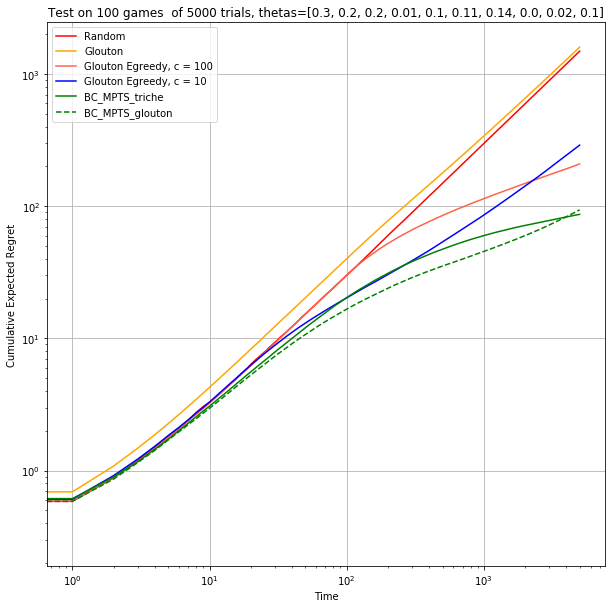

In [25]:
trials = [i for i in range(referee_Oracle_5000trials_20games_thetas_final.nb_trials)]
plt.figure(figsize=(10, 10))

plt.plot(trials, np.cumsum(referee_Random_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials],'r-', label='Random')

plt.plot(trials, np.cumsum(referee_greedy_5000trials_100games_thetas_final.get_regret_expected(), axis=0)[trials],'orange', label='greedy')
plt.plot(trials, np.cumsum(referee_greedy_EGreedy_100_5000trials_100games_thetas_final.get_regret_expected(), axis=0)[trials],color='tomato', label='greedy Egreedy, c = 100')
plt.plot(trials, np.cumsum(referee_greedy_EGreedy_10_5000trials_100games_thetas_final.get_regret_expected(), axis=0)[trials],color='b', label='greedy Egreedy, c = 10')

plt.plot(trials, np.cumsum(referee_BC_MPTS_triche_5000trials_100games_thetas_final.get_regret_expected(), axis=0)[trials],'g-', label='BC_MPTS_triche')
plt.plot(trials, np.cumsum(referee_BC_MPTS_greedy_5000trials_100games_thetas_final.get_regret_expected(), axis=0)[trials],'g--' ,label='BC_MPTS_greedy')


plt.xlabel('Time')
plt.ylabel('Cumulative Expected Regret')
plt.title ('Test on '+ str(nb_game) + ' games  of '+ str(referee_Oracle_5000trials_20games_thetas_final.nb_trials)+' trials, thetas='+str(thetas_final))
plt.legend()
plt.grid(True)
plt.loglog()
plt.show()
  

### Game 20 Trial 10000

In [43]:
nb_trial = 10000
nb_game = 20

referee_Oracle_10000trials_20games_thetas_final = Referee(env,nb_trial)
referee_Random_10000trials_20games_thetas_final = Referee(env,nb_trial)

referee_greedy_10000trials_20games_thetas_final = Referee(env,nb_trial)
referee_greedy_EGreedy_100_10000trials_20games_thetas_final = Referee(env,nb_trial)
referee_greedy_EGreedy_10_10000trials_20games_thetas_final = Referee(env,nb_trial)

referee_BC_MPTS_triche_10000trials_20games_thetas_final  = Referee(env,nb_trial)
referee_BC_MPTS_greedy_10000trials_20games_thetas_final = Referee(env,nb_trial)

#referee_TSMH_base_1_5000trials_20games_thetas_final  = Referee(env,nb_trial)
referee_TSMH_kappa_desord_1_5000trials_20games_thetas_final = Referee(env,nb_trial)


In [44]:
start = time.time()
  
for i in range(nb_game):
    #print ('#### game '+str(i))
    #### Reboot player
    player_Oracle = oracle.Oracle(env.get_best_index())
    player_Random = random_player.Random(nb_prop,nb_place)


    player_greedy = greedy.greedy(nb_prop,nb_place,n_MAJ)
    player_greedy_EGreedy_10 =  greedy.greedy_EGreedy(10,nb_prop,nb_place,n_MAJ)
    player_greedy_EGreedy_100 =  greedy.greedy_EGreedy(100,nb_prop,nb_place,n_MAJ)


    player_BC_MPTS_triche = bc_mpts.BC_MPTS_triche(nb_prop,nb_place,kappas)
    player_BC_MPTS_greedy = bc_mpts.BC_MPTS_greedy(nb_prop,nb_place,n_MAJ)    
    
    #### Play game
    referee_Oracle_10000trials_20games_thetas_final.play_game(player_Oracle)
    referee_Random_10000trials_20games_thetas_final.play_game(player_Random)
    
    referee_greedy_10000trials_20games_thetas_final.play_game(player_greedy)
    referee_greedy_EGreedy_100_10000trials_20games_thetas_final.play_game(player_greedy_EGreedy_100)
    referee_greedy_EGreedy_10_10000trials_20games_thetas_final.play_game(player_greedy_EGreedy_10)
    
    referee_BC_MPTS_triche_10000trials_20games_thetas_final.play_game(player_BC_MPTS_triche)
    referee_BC_MPTS_greedy_10000trials_20games_thetas_final.play_game(player_BC_MPTS_greedy)

end = time.time()   
print ('time :',time_sec_to_HMS(end-start)) 

time : 0H 5min 8sec


In [16]:
start = time.time()
for i in range(nb_game):
    print ('#### game '+str(i))   
    start_game = time.time()
    ###Reboot player
    player_TSMH_kappa_desord_c_1 =  TS_MH_kappa_desordonne(nb_prop,nb_place,part0,pas,1)
    
    ##Play Game
    referee_TSMH_kappa_desord_1_10000trials_20games_thetas_final.play_game(player_TSMH_kappa_desord_c_1)
    end_game = time.time()
    print ('time_game :',time_sec_to_HMS(end_game-start_game)) 
end = time.time()
print ('time :',time_sec_to_HMS(end-start))

#### game 0
time_game : 0H 1min 42sec
#### game 1
time_game : 0H 1min 49sec
#### game 2
time_game : 0H 1min 40sec
#### game 3
time_game : 0H 1min 35sec
#### game 4
time_game : 0H 1min 33sec
#### game 5
time_game : 0H 1min 33sec
#### game 6
time_game : 0H 1min 35sec
#### game 7
time_game : 0H 1min 34sec
#### game 8
time_game : 0H 1min 36sec
#### game 9
time_game : 0H 1min 35sec
#### game 10
time_game : 0H 1min 35sec
#### game 11
time_game : 0H 1min 34sec
#### game 12
time_game : 0H 1min 34sec
#### game 13
time_game : 0H 1min 35sec
#### game 14
time_game : 0H 1min 34sec
#### game 15
time_game : 0H 1min 34sec
#### game 16
time_game : 0H 1min 33sec
#### game 17
time_game : 0H 1min 34sec
#### game 18
time_game : 0H 1min 34sec
#### game 19
time_game : 0H 1min 35sec
time : 0H 32min 3sec


In [14]:
trials = [i for i in range(referee_Oracle_10000trials_20games_thetas_final.nb_trials)]
plt.figure(figsize=(10, 10))

plt.plot(trials, np.cumsum(referee_Random_10000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials],'r-', label='Random')

plt.plot(trials, np.cumsum(referee_greedy_10000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials],'orange', label='greedy')
plt.plot(trials, np.cumsum(referee_greedy_EGreedy_100_10000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials],color='tomato', label='greedy Egreedy, c = 100')
plt.plot(trials, np.cumsum(referee_greedy_EGreedy_10_10000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials],color='b', label='greedy Egreedy, c = 10')

plt.plot(trials, np.cumsum(referee_BC_MPTS_triche_10000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials],'g-', label='BC_MPTS_triche')
plt.plot(trials, np.cumsum(referee_BC_MPTS_greedy_10000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials],'g--' ,label='BC_MPTS_greedy')

#plt.plot(trials, np.cumsum(referee_TSMH_kappa_desord_1_10000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'purple', linestyle = '--', label='TSMH_kappa_desord, c =1')

plt.xlabel('Time')
plt.ylabel('Cumulative Expected Regret')
plt.title ('Test on '+ str(nb_game) + ' games  of '+ str(nb_trial)+' trials, thetas = '+str(thetas_final))
plt.legend()
plt.grid(True)
plt.loglog()
plt.show()
  

NameError: name 'referee_Oracle_10000trials_20games_thetas3' is not defined

### write logs 

In [94]:
pwd

'C:\\Users\\gauthieca\\Desktop\\Code_ Thèse\\bandits-to-rank\\Test\\interaction'

In [95]:
cd result/eval_opponents/kappa_light_afterconfig/

C:\Users\gauthieca\Desktop\Code_ Thèse\bandits-to-rank\Test\interaction\result\eval_opponents\kappa_light_afterconfig


In [97]:


with open('referee_Oracle_5000trials_20games_afterconfig.txt', 'w') as file:
    json.dump(referee_Oracle_5000trials_20games_afterconfig.record_results, file)
with open('referee_Random_5000trials_20games_afterconfig.txt', 'w') as file:
    json.dump(referee_Random_5000trials_20games_afterconfig.record_results, file)
    
with open('referee_greedy_5000trials_20games_afterconfig.txt', 'w') as file:
    json.dump(referee_greedy_5000trials_20games_afterconfig.record_results, file)
with open('referee_greedy_EGreedy_100_5000trials_20games_afterconfig.txt', 'w') as file:
    json.dump(referee_greedy_EGreedy_100_5000trials_20games_afterconfig.record_results, file)

with open('referee_BC_MPTS_triche_5000trials_20games_afterconfig.txt', 'w') as file:
    json.dump(referee_BC_MPTS_triche_5000trials_20games_afterconfig.record_results, file)    
with open('referee_BC_MPTS_greedy_5000trials_20games_afterconfig.txt', 'w') as file:
    json.dump(referee_BC_MPTS_greedy_5000trials_20games_afterconfig.record_results, file)
    
with open('referee_TSMH_kappa_desord_1_5000trials_20games_afterconfig.txt', 'w') as file:
    json.dump(referee_TSMH_kappa_desord_1_5000trials_20games_afterconfig.record_results, file)
with open('referee_TSMH_kappa_desord_01_5000trials_20games_afterconfig.txt', 'w') as file:
    json.dump(referee_TSMH_kappa_desord_01_5000trials_20games_afterconfig.record_results, file)
